<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction
## through PCA

![Dimensions](https://github.com/fenago/datasets/blob/main/pca/1.png?raw=true)

![EKG](https://github.com/fenago/datasets/blob/main/pca/2.png?raw=true)

![CV](https://github.com/fenago/datasets/blob/main/pca/3.png?raw=true)

![PacMan](https://github.com/fenago/datasets/blob/main/pca/4.png?raw=true)


In [ ]:
from numpy import random, array

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random

data = createClusteredData(100, 5)


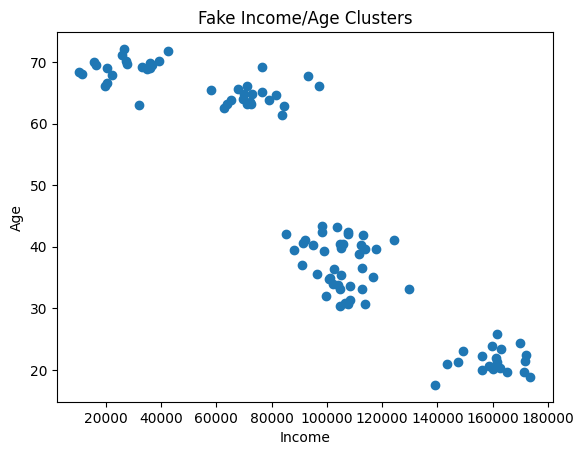

In [ ]:
plt.scatter(data[:,0], data[:,1])
plt.title('Fake Income/Age Clusters')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [ ]:
model = KMeans(n_clusters=5)
model = model.fit(scale(data))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

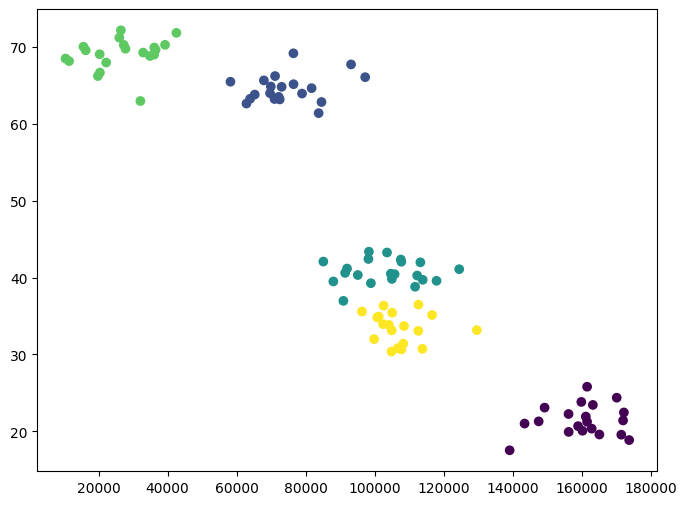

In [ ]:
# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

In [ ]:
# Define the number of individuals and clusters
num_individuals = 200
num_clusters = 4

# Function to create clustered data
def create_clustered_data(num_individuals, num_clusters):
    points_per_cluster = float(num_individuals) / num_clusters
    data = []
    for i in range(num_clusters):
        # Generate random centroids for income, age, and savings
        income_centroid = random.uniform(20000.0, 200000.0)
        age_centroid = random.uniform(20.0, 70.0)
        savings_centroid = random.uniform(1000.0, 50000.0)
        for j in range(int(points_per_cluster)):
            # Create data points as variations around the centroids
            income = random.normal(income_centroid, 10000.0)
            age = random.normal(age_centroid, 2.0)
            savings = random.normal(savings_centroid, 5000.0)
            data.append([income, age, savings])
    return array(data)

In [ ]:
# Create the dataset
data = create_clustered_data(num_individuals, num_clusters)

In [ ]:
import pandas as pd
# Convert to a pandas DataFrame for easier manipulation
df = pd.DataFrame(data, columns=['Income', 'Age', 'Savings'])
df.head()  # Display the first few rows of the dataframe

,Income,Age,Savings
0,100457.948602,59.139260,9867.121620
1,67757.328596,64.020402,1924.497823
2,102521.201749,57.548486,12230.664677
3,92495.582476,58.789220,6610.081621
4,74936.277912,58.553392,12947.789495


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scale the data for better results
scaled_data = scale(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

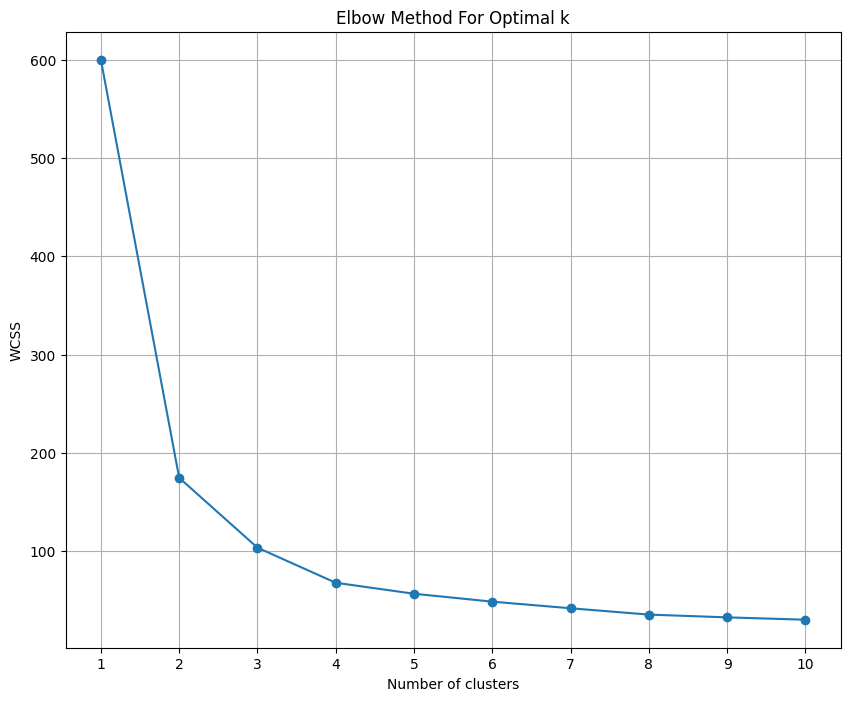

In [ ]:
# Calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the results on a line graph to observe 'The Elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Apply K-Means
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Assign the cluster centers
cluster_centers = kmeans_model.cluster_centers_

In [ ]:
# Assign the labels to each data point
labels = kmeans_model.labels_

In [ ]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3,
       0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

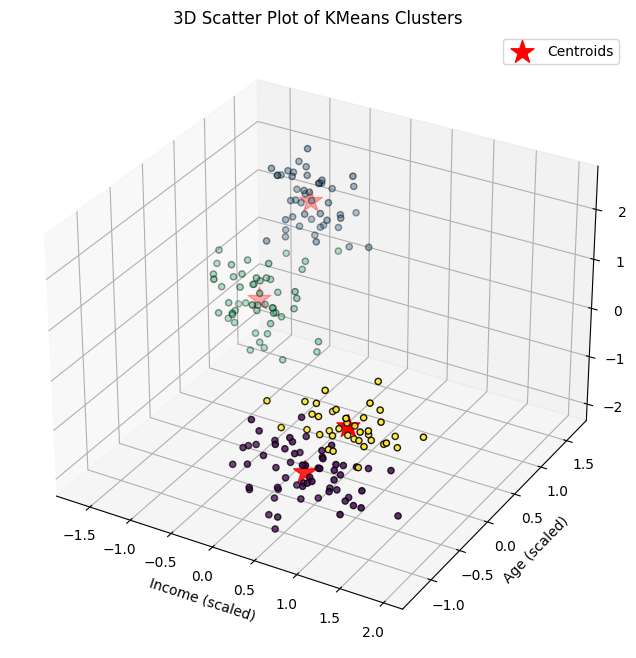

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2],
                     c=labels.astype(float), cmap='viridis', edgecolor='k')

# Plot cluster centers
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2],
           s=300, c='red', marker='*', label='Centroids')

# Set plot labels
ax.set_xlabel('Income (scaled)')
ax.set_ylabel('Age (scaled)')
ax.set_zlabel('Savings (scaled)')
ax.set_title('3D Scatter Plot of KMeans Clusters')

# Legend
ax.legend()

# Show plot
plt.show()

In [ ]:
# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans_model.labels_


In [ ]:
df.sample(5)

,Income,Age,Savings,Cluster
8,69192.618868,57.583144,11225.217768,2
121,118943.289203,36.159584,1601.632621,0
10,85076.205751,61.008046,16756.866816,1
58,154094.436552,38.204966,1922.804426,0
133,121822.753417,35.829888,-4932.662389,0


In [ ]:
# https://raw.githubusercontent.com/fenago/datasets/main/Life%20Expectancy%20Data.csv

In [ ]:
import pandas as pd

# Load the dataset
file_path = "https://raw.githubusercontent.com/fenago/datasets/main/Life%20Expectancy%20Data.csv"
life_expectancy_df = pd.read_csv(file_path)




In [ ]:
life_expectancy_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
# For simplicity, let's fill missing values with the mean of the column
# First, identify numeric columns
numeric_columns = life_expectancy_df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values for each numeric column with the mean of that column
for column in numeric_columns:
    life_expectancy_df[column].fillna(life_expectancy_df[column].mean(), inplace=True)

# Check for missing values again to confirm they have been filled
missing_values_after_filling = life_expectancy_df.isnull().sum()

In [ ]:
# Check the dataframe after filling missing values
missing_values_filled = life_expectancy_df.isnull().sum()
missing_values_filled

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
life_expectancy_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
# Convert categorical columns to numeric
# We'll use one-hot encoding for the 'Status' column and label encoding for 'Country' since it has many unique values
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns=['Status'])

In [ ]:
life_expectancy_df.dtypes

Country                             object
Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Status_Developed                      bool
Status_Developing                     bool
dtype: obje